<font size = 1 color="gray">Introducción a la programación científica</font>  

# Práctica 2. Curso 2024/2025

## Cálculo con notebooks Jupyter

### 1. Sistema de EDOs acopladas. Modelo de epidemia SIR

(4 puntos)

El modelo ***SIR*** fue propuesto por Kermack y McKendric en 1927 y describe cómo se extiende una epidemia en una población "N", usando tres magnitudes: "S" ("Susceptible", población sana pero no inmune al patógeno), "I" ("Infectado" población infectada y contagiadora), "R" ("Recuperado" población curada e inmunizada). Las tres se miden en número de individuos y se cumple en todo momento que $S+R+I = N$. Se supone que no hay vacuna y nadie muere.

Las ecuaciones diferenciales son:

$dS/dt = −βSI/N$

$dI/dt = βSI/N−γI$

$dR/dt = γI$

La primera ecuación indica que la variación del número de individuos susceptibles es el producto de contagios entre Susceptibles e Infectados, que se encuentran con una tasa β y con una probabilidad de contagio $1$, dividido por el total de la población. Inicialmente todos los habitantes menos uno están sanos pero no son inmunes, este número solo puede disminuir.

La segunda ecuación es la variación de infectados, que crecen conforme los pacientes Susceptibles se Infectan al ritmo que determina la primera ecuación, pero además puede disminuir cuando el sistema inmunológico hace su trabajo y un Infectado se Recupera y se inmuniza (segundo término).

La tercera, que el número de individuos recuperados es proporcional al de infectados. La fracción γ (γ<1) es la velocidad de recuperación de los enfermos.

Al cociente $β/γ$ se le denomina tasa de reproducción o $R_{0}$, si es mayor que $1$ la infección se extiende por toda la población, si es inferior se extingue. Puede actuarse aumentando el denominador (reduciendo el tiempo de recuperación encontrando una cura) o disminuyendo el numerador, al rebajar el número de contactos con una cuarentena.

Si existe vacuna el modelo $SIR$ simple ya no sirve, en ese caso hay que incluir una nueva ecuación que representa el número de individuos que pasan directamente de "S" a "R" al inmunizarse.

Resolver el modelo SIR, con las condiciones que se especifican en lasiguiente celda y representar la evolución para tres valores de $R_{0}$: 0.5, 1 y 1.8

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

In [43]:
# Población total. Ponemos 100 y así la traducción a porcentaje es inmediata
N = 100
I0, R0 = 1, 0  # Inicialmente hay un infectado y ningún recuperado. No confundir R0 con la
               # tasa de reproducción, aquí es el número de infectados en t = 0
S0 = N - I0 - R0   # Susceptibles de infección
beta, gamma = 0.18, 1./10     # Tasas de encuentro (adimensional) y recuperación (1/días)
tIni = 0
tFin = 200
nPuntos = tFin

t = np.linspace(tIni,tFin,nPuntos) 

In [44]:
def funcionModeloSIR(y,t,beta,N,gamma):
    S,I,R = y
    dS_dt = -beta * S * I / N
    dI_dt = (beta * S * I / N) - (gamma * I)
    dR_dt = gamma * I
    return np.array([dS_dt,dI_dt,dR_dt])

In [45]:
yIni = S0,I0,R0

solSIR = odeint(funcionModeloSIR, yIni,t, args=(beta,N,gamma))
S,I,R = solSIR.T

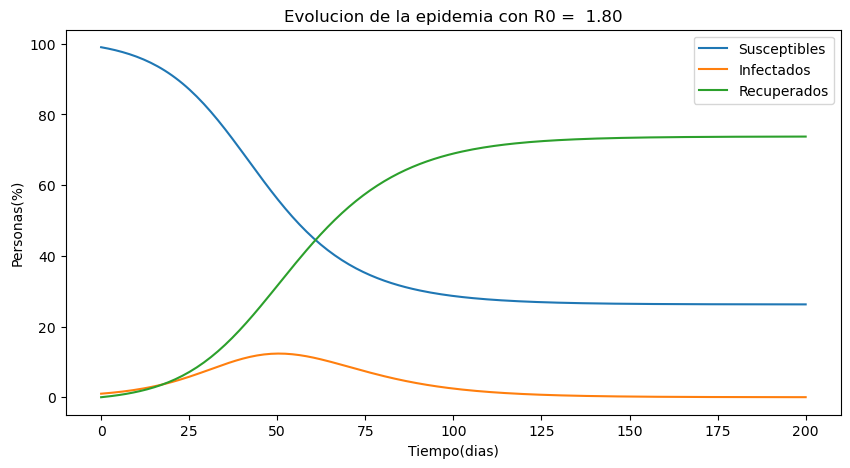

In [46]:
plt.figure(figsize = (10,5))
plt.xlabel("Tiempo(dias)")
plt.ylabel("Personas(%)")
plt.title("Evolucion de la epidemia con R0 =  {:.2f}".format(beta/gamma))
plt.plot(t,S,label = "Susceptibles")
plt.plot(t,I,label = "Infectados")
plt.plot(t,R,label = "Recuperados")
plt.legend()
plt.show()

## 2. Ecuación de difusión

(4 puntos)

Tenemos una barra metálica homogénea de longitud 3m y podemos suponer que de grosor despreciable frente a la longitud. Esta barra está sometida a la llama de un soplete situado a 1m del origen, con una llama de temperatura 800K y que puede modelarse como un puso gaussiano muy estrecho. A 2m del origen, la barra se enfría con un chorro de aire a 273K, que puede modelarse también como un pulso gaussiano. Si la conductividad térmica adimensional es 0.3, representar la gráfica de la temperatura en la barra 1, 5 y 10 segundos después de comenzar el experimento.

(2 puntos adicionales)
Representar la animación de la evolución de la temperatura

In [47]:
alpha = 0.3
longitud = 3
num_puntos = 1000
num_steps = 10000
valores_t = [1,5,10]
dx = longitud / (num_puntos-1)
dt = alpha * dx**2
T_0 = 300

x = np.linspace(0,longitud,num_puntos)

pos_soplete = 1
temp_soplete = 800

pos_chorro = 2
temp_chorro = 273

In [48]:
def pulso_gaussiano(x,pos,sigma_cuadrado,T_0):
    return T_0 * np.exp(-(x-pos)**2/(2*sigma_cuadrado))

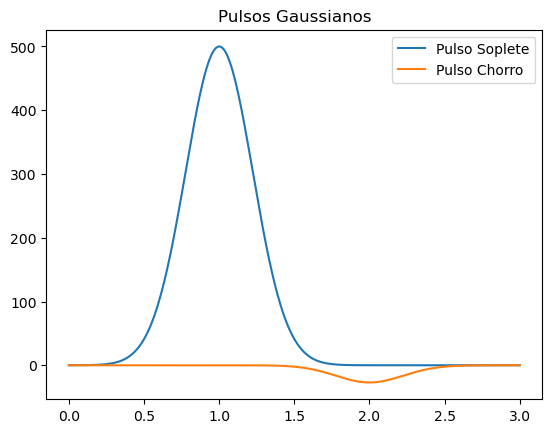

In [49]:
varianza_gaussiana = 0.05
T1 = pulso_gaussiano(x,pos_soplete,varianza_gaussiana,temp_soplete-T_0)
T2 = pulso_gaussiano(x,pos_chorro,varianza_gaussiana,temp_chorro-T_0)

plt.title("Pulsos Gaussianos")
plt.plot(x,T1,label = "Pulso Soplete")
plt.plot(x,T2, label = "Pulso Chorro")
plt.legend()
plt.show()
    
T = T1 - T2
for step in range (num_steps):
    T = T + alpha * np.gradient(np.gradient(T,dx), dx) * dt

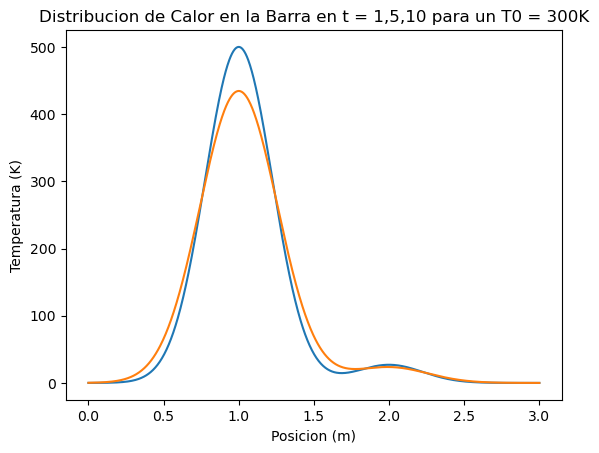

In [50]:
plt.plot(x,T1 - T2)
plt.plot(x,T)

plt.title("Distribucion de Calor en la Barra en t = 1,5,10 para un T0 = {:d}K".format(T_0))
plt.xlabel("Posicion (m)")
plt.ylabel("Temperatura (K)")

plt.show()

---

<font size="1" color="grey">
    (c) 2023-2024 Javier García Algarra. <a href='https://www.u-tad.com'>www.u-tad.com</a> <br>
Licensed under a Creative Commons Reconocimiento 4.0 Internacional License
</font> 